In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("D:\\Student Performance\\archive\\StudentsPerformance.csv")

In [3]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
X = df.drop(['average_score'], axis=1)
y = df['average_score']


In [4]:
x=pd.get_dummies(X,drop_first=True)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred=model.predict(x_test)

In [8]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("R2 score:",r2)


Mean absolute error: 1.156408302449563e-14
Mean squared error: 1.7803012909027795e-28
R2 score: 1.0


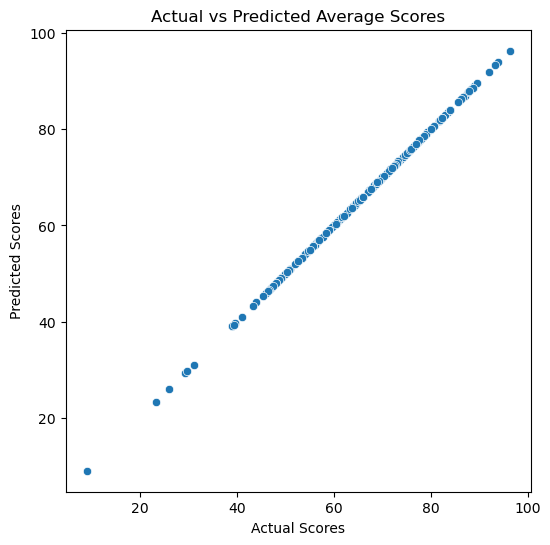

In [9]:

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Average Scores")
plt.show()


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R²:", r2_score(y_test, y_pred_tree))


Decision Tree Results:
MAE: 1.1033333333333335
MSE: 2.64
R²: 0.98768464671963


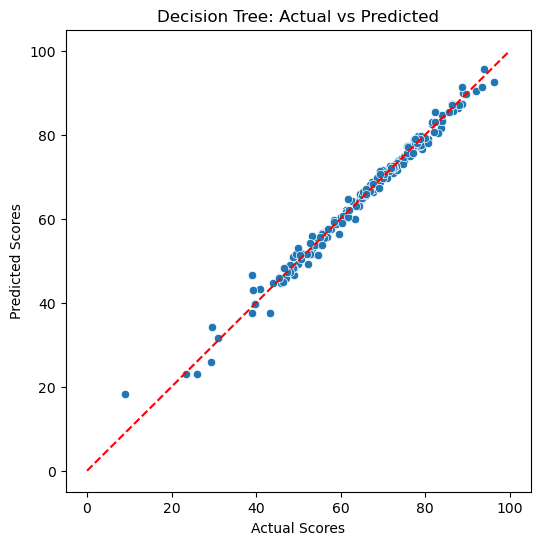

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_tree)
plt.plot([0,100],[0,100],'r--')  
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


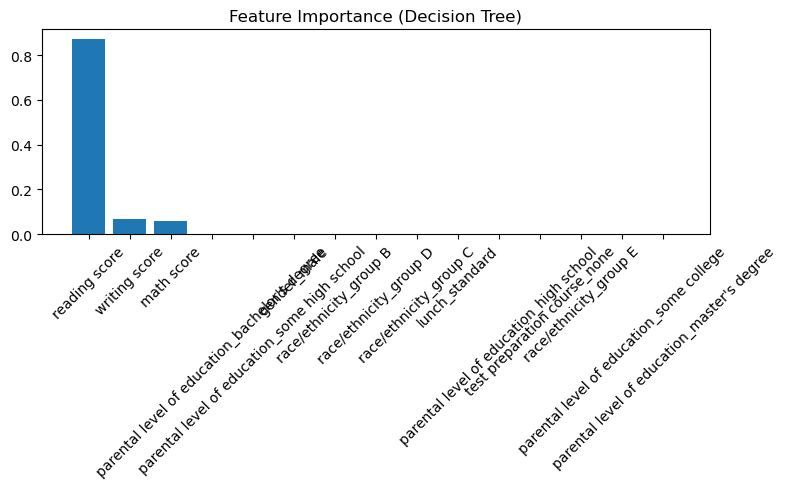

In [12]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = tree_model.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), x.columns[indices], rotation=45)
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()


In [13]:
import joblib


joblib.dump(tree_model, 'student_performance_model.pkl')

print("Model saved successfully as student_performance_model.pkl")


Model saved successfully as student_performance_model.pkl


In [14]:
loaded_model = joblib.load('student_performance_model.pkl')


In [15]:

sample = x_test.iloc[0].values.reshape(1, -1)
predicted_score = loaded_model.predict(sample)
print(f"Predicted Average Score: {predicted_score[0]:.2f}")


Predicted Average Score: 87.00


c:\Users\vibhu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [18]:
import pickle


with open("student_performance_model.pkl", "wb") as f:
    pickle.dump(model, f)

model_columns = x.columns.tolist()
with open("model_columns.pkl", "wb") as f:
    pickle.dump(model_columns, f)

print("Model and columns saved successfully!")


Model and columns saved successfully!
